In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ifsp-d3apl-2023-face-recognition/sample_submission.csv
/kaggle/input/ifsp-d3apl-2023-face-recognition/train.csv
/kaggle/input/ifsp-d3apl-2023-face-recognition/test.csv
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0664.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/1269.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0733.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0106.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0375.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/1075.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0285.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0591.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0799.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/1411.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0074.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/1031.jpg
/kaggle/input/ifsp-d3apl-2

# **1. Dataset**

# 1.1 Profiling

In [3]:
ls ../input/ifsp-d3apl-2023-face-recognition/train/train/

'Adam Sandler'/       'Faith Hill'/            'Meg Ryan'/
'Alec Baldwin'/       'George Clooney'/        'Meryl Streep'/
'Angelina Jolie'/     'Gordon Brown'/          'Michael Bloomberg'/
'Anna Kournikova'/    'Gwyneth Paltrow'/       'Mickey Rourke'/
'Ashton Kutcher'/     'Halle Berry'/           'Miley Cyrus'/
'Avril Lavigne'/      'Harrison Ford'/         'Morgan Freeman'/
'Barack Obama'/       'Hugh Jackman'/          'Nicole Kidman'/
'Ben Affleck'/        'Hugh Laurie'/           'Nicole Richie'/
'Beyonce Knowles'/    'Jack Nicholson'/        'Orlando Bloom'/
'Brad Pitt'/          'Jennifer Aniston'/      'Reese Witherspoon'/
'Cameron Diaz'/       'Jennifer Lopez'/        'Renee Zellweger'/
'Cate Blanchett'/     'Jennifer Love Hewitt'/  'Ricky Martin'/
'Charlize Theron'/    'Jessica Alba'/          'Robert Gates'/
'Christina Ricci'/    'Jessica Simpson'/       'Sania Mirza'/
'Claudia Schiffer'/   'Joaquin Phoenix'/       'Scarlett Johansson'/
'Clive Owen'/         'John Travolta

In [4]:
import os

dataset_folder = '../input/ifsp-d3apl-2023-face-recognition/train/train/'

class_folders = sorted(os.listdir(dataset_folder))


print(class_folders)
print(f'Number of class: {len(class_folders)}')

['Adam Sandler', 'Alec Baldwin', 'Angelina Jolie', 'Anna Kournikova', 'Ashton Kutcher', 'Avril Lavigne', 'Barack Obama', 'Ben Affleck', 'Beyonce Knowles', 'Brad Pitt', 'Cameron Diaz', 'Cate Blanchett', 'Charlize Theron', 'Christina Ricci', 'Claudia Schiffer', 'Clive Owen', 'Colin Farrell', 'Colin Powell', 'Cristiano Ronaldo', 'Daniel Craig', 'Daniel Radcliffe', 'David Beckham', 'David Duchovny', 'Denise Richards', 'Drew Barrymore', 'Dustin Hoffman', 'Ehud Olmert', 'Eva Mendes', 'Faith Hill', 'George Clooney', 'Gordon Brown', 'Gwyneth Paltrow', 'Halle Berry', 'Harrison Ford', 'Hugh Jackman', 'Hugh Laurie', 'Jack Nicholson', 'Jennifer Aniston', 'Jennifer Lopez', 'Jennifer Love Hewitt', 'Jessica Alba', 'Jessica Simpson', 'Joaquin Phoenix', 'John Travolta', 'Julia Roberts', 'Julia Stiles', 'Kate Moss', 'Kate Winslet', 'Katherine Heigl', 'Keira Knightley', 'Kiefer Sutherland', 'Leonardo DiCaprio', 'Lindsay Lohan', 'Mariah Carey', 'Martha Stewart', 'Matt Damon', 'Meg Ryan', 'Meryl Streep', '

In [5]:
# show me the class proportions: number of samples per class
for class_folder in class_folders:
    full_class_folder = os.path.join(dataset_folder, class_folder)
    
    class_img_filenames = os.listdir(full_class_folder)
    print(f'Number of Images for Class "{class_folder}": {len(class_img_filenames)}')

Number of Images for Class "Adam Sandler": 88
Number of Images for Class "Alec Baldwin": 83
Number of Images for Class "Angelina Jolie": 194
Number of Images for Class "Anna Kournikova": 151
Number of Images for Class "Ashton Kutcher": 81
Number of Images for Class "Avril Lavigne": 279
Number of Images for Class "Barack Obama": 249
Number of Images for Class "Ben Affleck": 97
Number of Images for Class "Beyonce Knowles": 106
Number of Images for Class "Brad Pitt": 280
Number of Images for Class "Cameron Diaz": 226
Number of Images for Class "Cate Blanchett": 140
Number of Images for Class "Charlize Theron": 175
Number of Images for Class "Christina Ricci": 123
Number of Images for Class "Claudia Schiffer": 102
Number of Images for Class "Clive Owen": 114
Number of Images for Class "Colin Farrell": 125
Number of Images for Class "Colin Powell": 92
Number of Images for Class "Cristiano Ronaldo": 148
Number of Images for Class "Daniel Craig": 148
Number of Images for Class "Daniel Radclif

# 1.2 Preprocessing the dataset

In [6]:
max_n_samples_per_class = 80

In [7]:
import random

dataset_folder = '../input/ifsp-d3apl-2023-face-recognition/train/train/'
class_folders = sorted(os.listdir(dataset_folder))

# OPTIONAL: just to get the same selected images
random.seed(42)

img_full_paths = []
img_classes = []

for class_folder in class_folders:
    img_class = class_folder  # english
    print(f'Class: {img_class}')  # italiano
    
    # translated class
    #img_class = translate[class_folder]  # english
    #print(f'Translation: {img_class}')  # italiano
    
    # get the full class folder pathname
    full_class_folder = os.path.join(dataset_folder, class_folder)
    print(full_class_folder)
    
    # get all image filenames (without their parent dir) for the current class/animal
    class_img_filenames = sorted(os.listdir(full_class_folder))
    print(len(class_img_filenames))
    
    #### undersampling from scratch
    ### one possible strategy to select `max_n_samples_per_class` of samples randomly
    # random.shuffle(class_img_filenames)
    # class_img_filenames = class_img_filenames[:max_n_samples_per_class]

    class_img_filenames = random.sample(class_img_filenames, max_n_samples_per_class)
    print(f'Number of images: {len(class_img_filenames)}')
    
    for img_filename in class_img_filenames:
        full_img_path = os.path.join(full_class_folder, img_filename)
        
        img_full_paths.append(full_img_path)
        img_classes.append(img_class)
    
    print()

Class: Adam Sandler
../input/ifsp-d3apl-2023-face-recognition/train/train/Adam Sandler
88
Number of images: 80

Class: Alec Baldwin
../input/ifsp-d3apl-2023-face-recognition/train/train/Alec Baldwin
83
Number of images: 80

Class: Angelina Jolie
../input/ifsp-d3apl-2023-face-recognition/train/train/Angelina Jolie
194
Number of images: 80

Class: Anna Kournikova
../input/ifsp-d3apl-2023-face-recognition/train/train/Anna Kournikova
151
Number of images: 80

Class: Ashton Kutcher
../input/ifsp-d3apl-2023-face-recognition/train/train/Ashton Kutcher
81
Number of images: 80

Class: Avril Lavigne
../input/ifsp-d3apl-2023-face-recognition/train/train/Avril Lavigne
279
Number of images: 80

Class: Barack Obama
../input/ifsp-d3apl-2023-face-recognition/train/train/Barack Obama
249
Number of images: 80

Class: Ben Affleck
../input/ifsp-d3apl-2023-face-recognition/train/train/Ben Affleck
97
Number of images: 80

Class: Beyonce Knowles
../input/ifsp-d3apl-2023-face-recognition/train/train/Beyonce K

In [8]:
print(len(img_full_paths))

6640


In [9]:
print(len(img_classes))

6640


In [10]:
# creating a dataframe to store the image full pathnames and their corresponding classes
import pandas as pd

dataset_df = pd.DataFrame({
    'image_pathname': img_full_paths,
    'class': img_classes
})

dataset_df

,image_pathname,class
0,../input/ifsp-d3apl-2023-face-recognition/trai...,Adam Sandler
1,../input/ifsp-d3apl-2023-face-recognition/trai...,Adam Sandler
2,../input/ifsp-d3apl-2023-face-recognition/trai...,Adam Sandler
3,../input/ifsp-d3apl-2023-face-recognition/trai...,Adam Sandler
4,../input/ifsp-d3apl-2023-face-recognition/trai...,Adam Sandler
...,...,...
6635,../input/ifsp-d3apl-2023-face-recognition/trai...,Zac Efron
6636,../input/ifsp-d3apl-2023-face-recognition/trai...,Zac Efron
6637,../input/ifsp-d3apl-2023-face-recognition/trai...,Zac Efron
6638,../input/ifsp-d3apl-2023-face-recognition/trai...,Zac Efron


In [11]:
dataset_df['class'].value_counts()

Adam Sandler         80
Nicole Kidman        80
Miley Cyrus          80
Mickey Rourke        80
Michael Bloomberg    80
                     ..
Ehud Olmert          80
Dustin Hoffman       80
Drew Barrymore       80
Denise Richards      80
Zac Efron            80
Name: class, Length: 83, dtype: int64

# 1.3 Saving the preprocessed dataset

In [12]:
dataset_df.to_csv('../working/faces_dataset_balanced.csv', index=False)

# 1.4 Inspect an image

In [13]:
import cv2

In [14]:
dataset_df.loc[0, 'image_pathname']

'../input/ifsp-d3apl-2023-face-recognition/train/train/Adam Sandler/73.jpg'

In [15]:
# read an image
img = cv2.imread(dataset_df.loc[0, 'image_pathname'])
print(type(img))
img.shape

<class 'numpy.ndarray'>


(100, 100, 3)

In [16]:
# channel BLUE
img[:, :, 0]

array([[2, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
# channel GREEN
img[:, :, 1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [18]:
# channel RED
img[:, :, 2]

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
img.min(), img.max()

(0, 255)

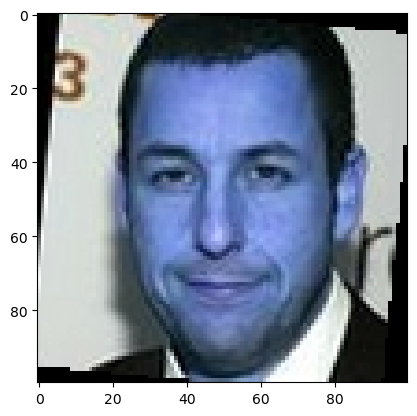

In [20]:
import matplotlib.pyplot as plt

plt.imshow(img)

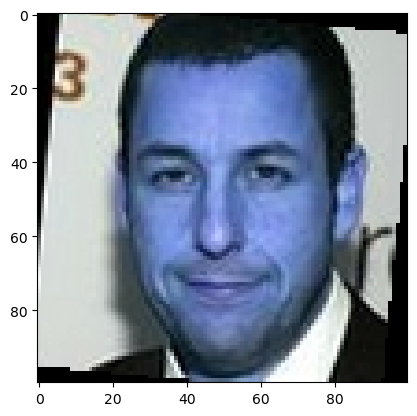

In [21]:
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_RGB = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

(100, 100)


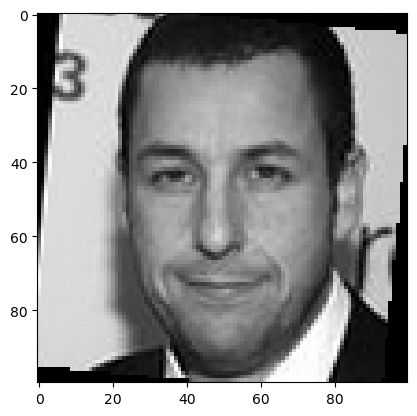

In [22]:
# read the color image as a gray image
gray_img = cv2.imread(dataset_df.loc[0, 'image_pathname'], cv2.IMREAD_GRAYSCALE)

print(gray_img.shape)

plt.imshow(gray_img, cmap='gray')

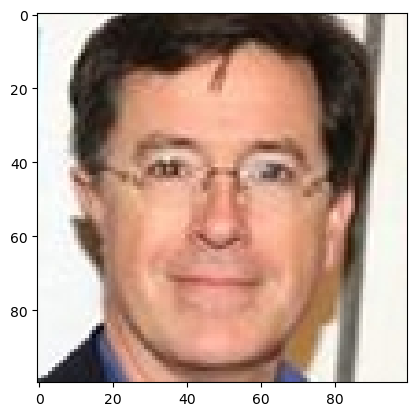

In [23]:
img = cv2.imread(dataset_df.loc[6000, 'image_pathname'])  # BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
plt.imshow(img)

In [24]:
img.shape

(100, 100, 3)

# 1.4 Create the training dataset

In [25]:
import tensorflow as tf
tf.__version__

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

'2.12.0'

In [26]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [27]:
dataset_df

,image_pathname,class
0,../input/ifsp-d3apl-2023-face-recognition/trai...,Adam Sandler
1,../input/ifsp-d3apl-2023-face-recognition/trai...,Adam Sandler
2,../input/ifsp-d3apl-2023-face-recognition/trai...,Adam Sandler
3,../input/ifsp-d3apl-2023-face-recognition/trai...,Adam Sandler
4,../input/ifsp-d3apl-2023-face-recognition/trai...,Adam Sandler
...,...,...
6635,../input/ifsp-d3apl-2023-face-recognition/trai...,Zac Efron
6636,../input/ifsp-d3apl-2023-face-recognition/trai...,Zac Efron
6637,../input/ifsp-d3apl-2023-face-recognition/trai...,Zac Efron
6638,../input/ifsp-d3apl-2023-face-recognition/trai...,Zac Efron


In [28]:
dataset_df["class"].unique()

array(['Adam Sandler', 'Alec Baldwin', 'Angelina Jolie',
       'Anna Kournikova', 'Ashton Kutcher', 'Avril Lavigne',
       'Barack Obama', 'Ben Affleck', 'Beyonce Knowles', 'Brad Pitt',
       'Cameron Diaz', 'Cate Blanchett', 'Charlize Theron',
       'Christina Ricci', 'Claudia Schiffer', 'Clive Owen',
       'Colin Farrell', 'Colin Powell', 'Cristiano Ronaldo',
       'Daniel Craig', 'Daniel Radcliffe', 'David Beckham',
       'David Duchovny', 'Denise Richards', 'Drew Barrymore',
       'Dustin Hoffman', 'Ehud Olmert', 'Eva Mendes', 'Faith Hill',
       'George Clooney', 'Gordon Brown', 'Gwyneth Paltrow', 'Halle Berry',
       'Harrison Ford', 'Hugh Jackman', 'Hugh Laurie', 'Jack Nicholson',
       'Jennifer Aniston', 'Jennifer Lopez', 'Jennifer Love Hewitt',
       'Jessica Alba', 'Jessica Simpson', 'Joaquin Phoenix',
       'John Travolta', 'Julia Roberts', 'Julia Stiles', 'Kate Moss',
       'Kate Winslet', 'Katherine Heigl', 'Keira Knightley',
       'Kiefer Sutherland', 'Leo

In [29]:
class_names = sorted(dataset_df["class"].unique())
n_classes = len(class_names)

print(f'Number of classes: {n_classes}')
print(f'Classes: {class_names}')

Number of classes: 83
Classes: ['Adam Sandler', 'Alec Baldwin', 'Angelina Jolie', 'Anna Kournikova', 'Ashton Kutcher', 'Avril Lavigne', 'Barack Obama', 'Ben Affleck', 'Beyonce Knowles', 'Brad Pitt', 'Cameron Diaz', 'Cate Blanchett', 'Charlize Theron', 'Christina Ricci', 'Claudia Schiffer', 'Clive Owen', 'Colin Farrell', 'Colin Powell', 'Cristiano Ronaldo', 'Daniel Craig', 'Daniel Radcliffe', 'David Beckham', 'David Duchovny', 'Denise Richards', 'Drew Barrymore', 'Dustin Hoffman', 'Ehud Olmert', 'Eva Mendes', 'Faith Hill', 'George Clooney', 'Gordon Brown', 'Gwyneth Paltrow', 'Halle Berry', 'Harrison Ford', 'Hugh Jackman', 'Hugh Laurie', 'Jack Nicholson', 'Jennifer Aniston', 'Jennifer Lopez', 'Jennifer Love Hewitt', 'Jessica Alba', 'Jessica Simpson', 'Joaquin Phoenix', 'John Travolta', 'Julia Roberts', 'Julia Stiles', 'Kate Moss', 'Kate Winslet', 'Katherine Heigl', 'Keira Knightley', 'Kiefer Sutherland', 'Leonardo DiCaprio', 'Lindsay Lohan', 'Mariah Carey', 'Martha Stewart', 'Matt Damon'

In [30]:
# number of samples per class
dataset_df['class'].value_counts()

Adam Sandler         80
Nicole Kidman        80
Miley Cyrus          80
Mickey Rourke        80
Michael Bloomberg    80
                     ..
Ehud Olmert          80
Dustin Hoffman       80
Drew Barrymore       80
Denise Richards      80
Zac Efron            80
Name: class, Length: 83, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

# for a stratified sampling, we need to pass the labels
labels = dataset_df['class']

dataset_df_full_train, dataset_df_test = train_test_split(dataset_df, test_size=0.2, random_state=42, stratify=labels)

In [32]:
dataset_df_full_train.shape

(5312, 2)

In [33]:
dataset_df_full_train.head()

,image_pathname,class
5087,../input/ifsp-d3apl-2023-face-recognition/trai...,Nicole Richie
5151,../input/ifsp-d3apl-2023-face-recognition/trai...,Orlando Bloom
1005,../input/ifsp-d3apl-2023-face-recognition/trai...,Charlize Theron
4229,../input/ifsp-d3apl-2023-face-recognition/trai...,Lindsay Lohan
3411,../input/ifsp-d3apl-2023-face-recognition/trai...,Joaquin Phoenix


In [34]:
dataset_df_test.shape

(1328, 2)

In [35]:
# for a stratified sampling, we need to pass the labels
labels_full_train = dataset_df_full_train['class']

dataset_df_train, dataset_df_val = train_test_split(dataset_df_full_train, train_size=0.8, random_state=42, stratify=labels_full_train)

dataset_df_train['class'].value_counts()

Cameron Diaz       52
Adam Sandler       52
Ashton Kutcher     52
Julia Stiles       52
David Duchovny     52
                   ..
Eva Mendes         51
Ricky Martin       51
Will Smith         51
Viggo Mortensen    51
Colin Farrell      51
Name: class, Length: 83, dtype: int64

In [36]:
# checking class balancing in the validation set
dataset_df_val['class'].value_counts()

Steve Carell       13
Shahrukh Khan      13
Halle Berry        13
Jennifer Lopez     13
Lindsay Lohan      13
                   ..
Keira Knightley    12
Cameron Diaz       12
Faith Hill         12
Julia Stiles       12
Ashton Kutcher     12
Name: class, Length: 83, dtype: int64

In [37]:
# checking class balancing in the training set
dataset_df_test['class'].value_counts()

Jennifer Love Hewitt    16
Nicole Richie           16
Mariah Carey            16
Kate Moss               16
Hugh Jackman            16
                        ..
Kate Winslet            16
Shakira                 16
Meryl Streep            16
Sharon Stone            16
Renee Zellweger         16
Name: class, Length: 83, dtype: int64

# **2. Training the model**

In [134]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


def build_cnn(input_shape=(64, 64, 3), n_classes=83):
    model = Sequential([
        # feature extraction
        Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape=input_shape),
        MaxPool2D(pool_size=(2,2)),
        Conv2D(filters=32, kernel_size=(4,4), activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Flatten(),
        
        # Fully-Connected Neural Network ==> MLP
        Dense(256, activation='relu'),
        Dense(n_classes, activation='softmax')
    ])
    
    return model

In [135]:

input_shape = (64, 64, 3)

model = build_cnn(input_shape, n_classes)
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [136]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 61, 61, 32)        1568      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 27, 27, 32)        16416     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 256)              

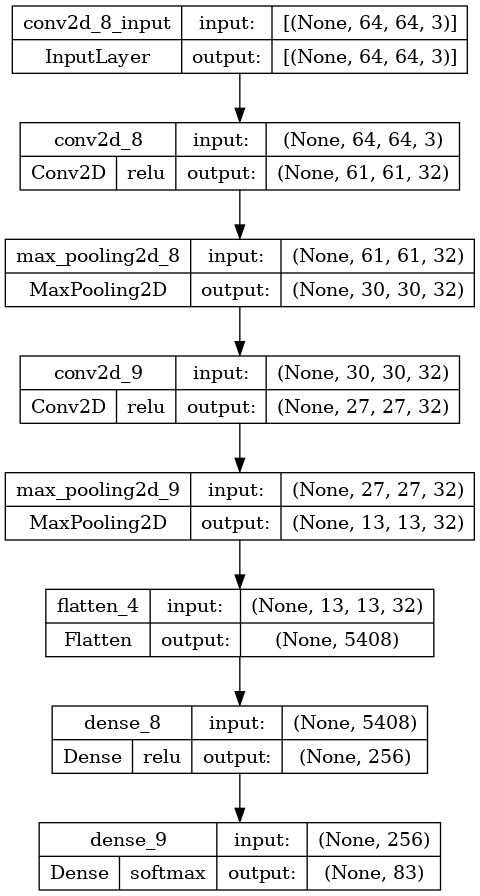

In [137]:
from tensorflow.keras.utils import plot_model
# vertical
plot_model(model, show_shapes=True, show_layer_activations=True)

# 2.1 Preprocessing the images

In [138]:
dataset_df.loc[0, 'image_pathname']

'../input/ifsp-d3apl-2023-face-recognition/train/train/Adam Sandler/73.jpg'

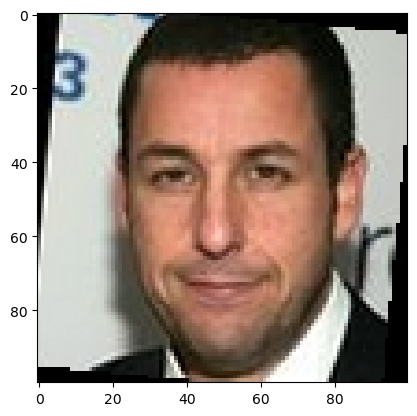

In [139]:
import cv2
import matplotlib.pyplot as plt

# BGR
img = cv2.imread('../input/ifsp-d3apl-2023-face-recognition/train/train/Adam Sandler/73.jpg')
# BGR ==> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [140]:
# aspect ratio = width / height
aspect_ratio = img.shape[0] / img.shape[1]
aspect_ratio

1.0

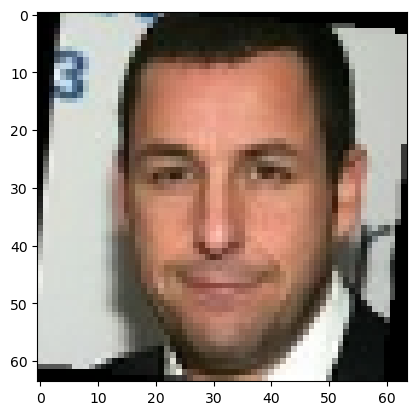

In [141]:
new_img_dims = (64, 64)

# resizing
res_img = cv2.resize(img, new_img_dims, interpolation=cv2.INTER_LINEAR)

plt.imshow(res_img)

In [142]:
### aspect ratio = width / height
aspect_ratio = img.shape[0] / img.shape[1]
aspect_ratio


1.0

In [143]:
import numpy as np

# preprocess the image dataset and return the feature matrix and the label array: X, y
def preprocess_faces_dataset(dataset_df, label_encoder, new_img_dims=(64,64), verbose=1000):
#def preprocess_faces_dataset(dataset_df, label_encoder, new_img_dims=(100,100), verbose=1000):
    image_list = []  # list of preprocessed images (numpy arrays)
    
    for index, img_path in enumerate(dataset_df['image_pathname']):
        img = cv2.imread(img_path)  # BGR
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # RGB
        
        # image resizing 
        # for gray or color images, the linear interpolation sounds good
        img = cv2.resize(img, new_img_dims, interpolation=cv2.INTER_LINEAR)
        image_list.append(img)
        
        # verbose - print every 1000 iterations
        if index % verbose == 0:
            print(f'{index + 1}/{dataset_df.shape[0]} - {img_path}')
    
    # feature matrix
    # shape = (n_imgs, width, height, n_channels)
    X = np.array(image_list)
    
    # feature scaling
    X = X / 255.0
    
    # encoding the classes
    y = label_encoder.transform(dataset_df['class'])
    
    return X, y

In [144]:
# training a Label Encoder from the train set
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(dataset_df_train['class'])

label_encoder.classes_

array(['Adam Sandler', 'Alec Baldwin', 'Angelina Jolie',
       'Anna Kournikova', 'Ashton Kutcher', 'Avril Lavigne',
       'Barack Obama', 'Ben Affleck', 'Beyonce Knowles', 'Brad Pitt',
       'Cameron Diaz', 'Cate Blanchett', 'Charlize Theron',
       'Christina Ricci', 'Claudia Schiffer', 'Clive Owen',
       'Colin Farrell', 'Colin Powell', 'Cristiano Ronaldo',
       'Daniel Craig', 'Daniel Radcliffe', 'David Beckham',
       'David Duchovny', 'Denise Richards', 'Drew Barrymore',
       'Dustin Hoffman', 'Ehud Olmert', 'Eva Mendes', 'Faith Hill',
       'George Clooney', 'Gordon Brown', 'Gwyneth Paltrow', 'Halle Berry',
       'Harrison Ford', 'Hugh Jackman', 'Hugh Laurie', 'Jack Nicholson',
       'Jennifer Aniston', 'Jennifer Lopez', 'Jennifer Love Hewitt',
       'Jessica Alba', 'Jessica Simpson', 'Joaquin Phoenix',
       'John Travolta', 'Julia Roberts', 'Julia Stiles', 'Kate Moss',
       'Kate Winslet', 'Katherine Heigl', 'Keira Knightley',
       'Kiefer Sutherland', 'Leo

In [145]:
# transform/map the string class to the trained numeric class
label_encoder.transform(['Alec Baldwin', 'Claudia Schiffer', 'Zac Efron'])

array([ 1, 14, 82])

In [146]:
# preprocessing the train set
X_train, y_train = preprocess_faces_dataset(dataset_df_train, label_encoder, new_img_dims=(64, 64))
#X_train, y_train = preprocess_faces_dataset(dataset_df_train, label_encoder, new_img_dims=(100, 100))

1/4249 - ../input/ifsp-d3apl-2023-face-recognition/train/train/Colin Farrell/206.jpg
1001/4249 - ../input/ifsp-d3apl-2023-face-recognition/train/train/Anna Kournikova/37.jpg
2001/4249 - ../input/ifsp-d3apl-2023-face-recognition/train/train/Kate Winslet/277.jpg
3001/4249 - ../input/ifsp-d3apl-2023-face-recognition/train/train/Gwyneth Paltrow/280.jpg
4001/4249 - ../input/ifsp-d3apl-2023-face-recognition/train/train/Gwyneth Paltrow/77.jpg


In [147]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train (classes): {np.unique(y_train)}')
print(f'y_train.shape: {y_train.shape}')

# rescaled 24-bit color image
print(f'Min. value of X_train: {X_train.min()}')
print(f'Max. value of X_train: {X_train.max()}\n')

X_train.shape: (4249, 64, 64, 3)
y_train (classes): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82]
y_train.shape: (4249,)
Min. value of X_train: 0.0
Max. value of X_train: 1.0



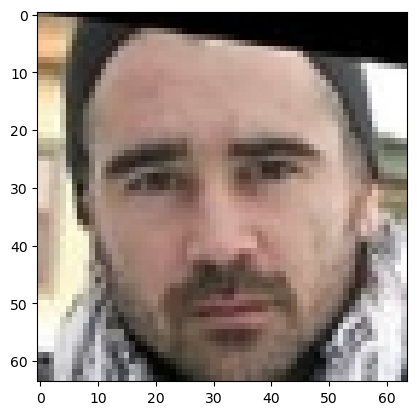

In [148]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [149]:

# preprocessing the validation set
X_val, y_val = preprocess_faces_dataset(dataset_df_val, label_encoder, new_img_dims=(64, 64))
#X_val, y_val = preprocess_faces_dataset(dataset_df_val, label_encoder, new_img_dims=(100, 100))

1/1063 - ../input/ifsp-d3apl-2023-face-recognition/train/train/Steve Carell/209.jpg
1001/1063 - ../input/ifsp-d3apl-2023-face-recognition/train/train/David Beckham/150.jpg


In [150]:
print(f'X_val.shape: {X_val.shape}')
print(f'y_val (classes): {np.unique(y_val)}')
print(f'y_val.shape: {y_val.shape}')

# rescaled 24-bit color image
print(f'Min. value of X_val: {X_val.min()}')
print(f'Max. value of X_val: {X_val.max()}\n')

X_val.shape: (1063, 64, 64, 3)
y_val (classes): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82]
y_val.shape: (1063,)
Min. value of X_val: 0.0
Max. value of X_val: 1.0



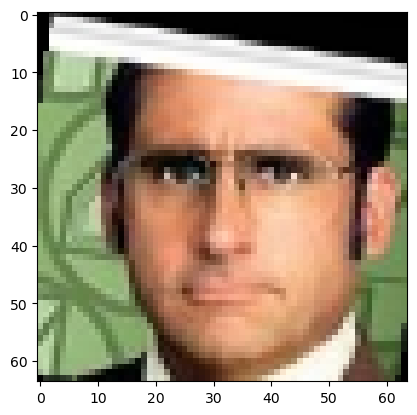

In [151]:
import matplotlib.pyplot as plt
plt.imshow(X_val[0])

In [152]:
# preprocessing the test set
X_test, y_test = preprocess_faces_dataset(dataset_df_test, label_encoder, new_img_dims=(64, 64))

1/1328 - ../input/ifsp-d3apl-2023-face-recognition/train/train/Jennifer Love Hewitt/160.jpg
1001/1328 - ../input/ifsp-d3apl-2023-face-recognition/train/train/Adam Sandler/293.jpg


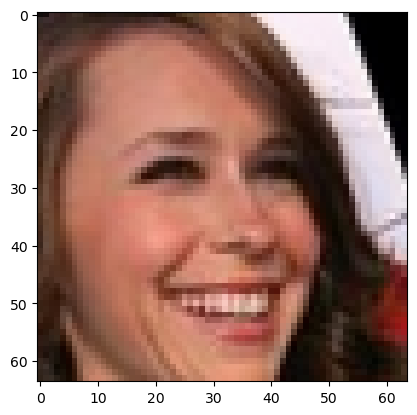

In [153]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0])

# 2.3. Saving the preprocessed data

In [154]:
import os

out_dir = '../working/preprocessed'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
dataset_df_full_train.to_csv(os.path.join(out_dir, 'full_train.csv'), index=False)

dataset_df_train.to_csv(os.path.join(out_dir, 'train.csv'), index=False)
np.save(os.path.join(out_dir, 'train_data_64x64x3.npy'), X_train)
np.save(os.path.join(out_dir, 'train_labels.npy'), y_train)

dataset_df_val.to_csv(os.path.join(out_dir, 'validation.csv'), index=False)
np.save(os.path.join(out_dir, 'validation_data_64x64x3.npy'), X_val)
np.save(os.path.join(out_dir, 'validation_labels.npy'), y_val)

dataset_df_test.to_csv(os.path.join(out_dir, 'test.csv'), index=False)
np.save(os.path.join(out_dir, 'test_data_64x64x3.npy'), X_test)
np.save(os.path.join(out_dir, 'test_labels.npy'), y_test)

# 2.5 Training the model

In [155]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [156]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/100
133/133 [==============================] - 14s 99ms/step - loss: 4.4252 - accuracy: 0.0120 - val_loss: 4.4144 - val_accuracy: 0.0151
Epoch 2/100
133/133 [==============================] - 14s 103ms/step - loss: 4.4134 - accuracy: 0.0129 - val_loss: 4.4092 - val_accuracy: 0.0075
Epoch 3/100
133/133 [==============================] - 13s 99ms/step - loss: 4.4062 - accuracy: 0.0167 - val_loss: 4.4018 - val_accuracy: 0.0141
Epoch 4/100
133/133 [==============================] - 13s 97ms/step - loss: 4.3957 - accuracy: 0.0188 - val_loss: 4.3901 - val_accuracy: 0.0085
Epoch 5/100
133/133 [==============================] - 13s 96ms/step - loss: 4.3762 - accuracy: 0.0228 - val_loss: 4.3657 - val_accuracy: 0.0235
Epoch 6/100
133/133 [==============================] - 13s 96ms/step - loss: 4.3424 - accuracy: 0.0297 - val_loss: 4.3292 - val_accuracy: 0.0376
Epoch 7/100
133/133 [==============================] - 12s 94ms/step - loss: 4.2812 - accuracy: 0.0393 - val_loss: 4.2819 - val_a

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

Text(0, 0.5, 'Score')

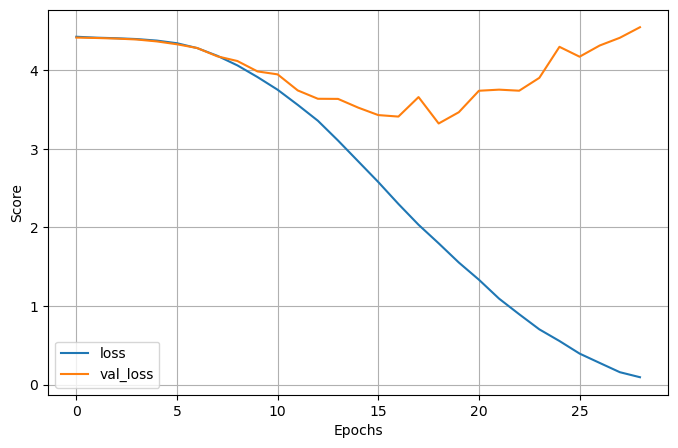

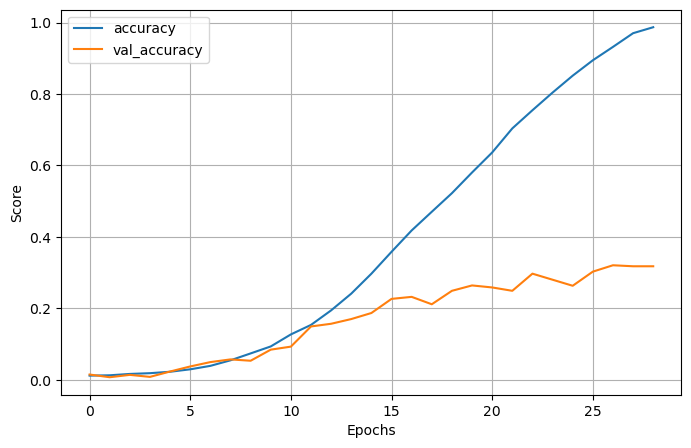

In [158]:
history_df[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Score')

history_df[['accuracy', 'val_accuracy']].plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Score')

In [159]:

model.evaluate(X_test, y_test)

42/42 [==============================] - 1s 21ms/step - loss: 3.2392 - accuracy: 0.2801


[3.239154577255249, 0.28012049198150635]

In [160]:
y_test_proba = model.predict(X_test)
y_test_proba

42/42 [==============================] - 1s 20ms/step


array([[4.5663132e-06, 2.4893032e-05, 2.0900772e-05, ..., 3.4100853e-07,
        1.3003137e-03, 5.4827880e-05],
       [1.9648262e-04, 1.2790209e-04, 9.0288566e-05, ..., 1.3800403e-05,
        2.5557328e-04, 9.7919165e-06],
       [6.9422217e-04, 8.2840334e-06, 3.1065306e-04, ..., 1.3156206e-05,
        1.1005722e-05, 2.0845065e-02],
       ...,
       [4.7752321e-05, 2.8196962e-05, 6.9321504e-05, ..., 8.4769598e-04,
        5.4206954e-05, 2.6875018e-06],
       [6.5106025e-05, 2.3719065e-03, 1.6760364e-03, ..., 4.7897635e-04,
        2.4524274e-05, 6.2741110e-06],
       [1.8853491e-02, 9.9326753e-05, 3.6025868e-04, ..., 8.5826302e-03,
        1.2586704e-05, 8.3058861e-05]], dtype=float32)

In [161]:
y_test_pred = np.argmax(y_test_proba, axis=1)
y_test_pred

array([65, 68, 65, ..., 50, 65, 11])

In [162]:
from sklearn.metrics import classification_report

class_names = label_encoder.classes_

print(classification_report(y_test, y_test_pred, target_names=[name for name in class_names]))

                      precision    recall  f1-score   support

        Adam Sandler       0.30      0.38      0.33        16
        Alec Baldwin       0.33      0.06      0.11        16
      Angelina Jolie       0.33      0.12      0.18        16
     Anna Kournikova       0.33      0.06      0.11        16
      Ashton Kutcher       0.40      0.12      0.19        16
       Avril Lavigne       0.50      0.25      0.33        16
        Barack Obama       0.20      0.06      0.10        16
         Ben Affleck       0.17      0.12      0.14        16
     Beyonce Knowles       0.00      0.00      0.00        16
           Brad Pitt       0.09      0.12      0.10        16
        Cameron Diaz       0.00      0.00      0.00        16
      Cate Blanchett       0.13      0.44      0.21        16
     Charlize Theron       0.22      0.12      0.16        16
     Christina Ricci       0.18      0.19      0.18        16
    Claudia Schiffer       0.50      0.19      0.27        16
       

In [164]:
y_test_class_name = label_encoder.inverse_transform(y_test)
y_test_pred_class_name = label_encoder.inverse_transform(y_test_pred)

In [166]:
misclassification_mask = y_test_class_name != y_test_pred_class_name

In [167]:
sheep_error_mask = misclassification_mask & (y_test_class_name == "Alec Baldwin")

np.argwhere(sheep_error_mask)[:3]

array([[ 18],
       [ 48],
       [132]])

Text(0.5, 1.0, 'True: Alec Baldwin, Predicted: Stephen Colbert')

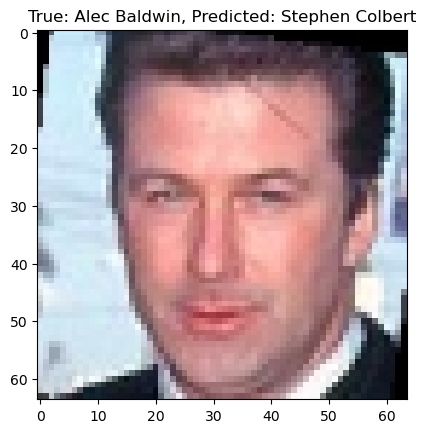

In [168]:
img_idx = 18

plt.imshow(X_test[img_idx])
plt.title(f'True: {y_test_class_name[img_idx]}, Predicted: {y_test_pred_class_name[img_idx]}')